In [124]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import pylab
from matplotlib import image

## Code to capture Foto

In [125]:
#cap = cv2.VideoCapture(0)
#while(True):
 #   ret, frame = cap.read()
 #   gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 #   cv2.imshow('frame', gray)
 #   if cv2.waitKey(1) & 0xFF == ord('q'):
 #       break;
#cap.release()
#cv2.destroyAllWindows()

# Das Graustufenbild

/Users/hannesbrugger/PycharmProjects/SSS/Signale-und-Systeme/Versuch2/Versuch2-Messdaten/GrayStufen.png
360


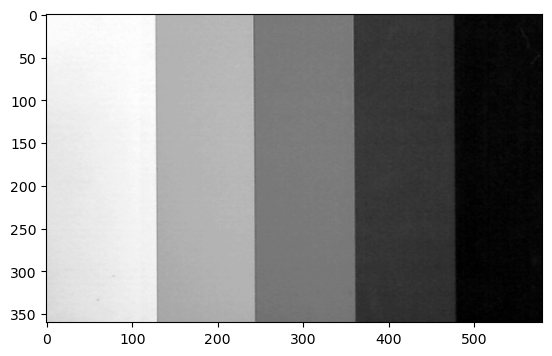

In [126]:
path = os.getcwd() + "/Versuch2-Messdaten/GrayStufen.png"
print(path)
img = cv2.imread(path)
if img is None:
     print("Check file path")
img = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)[10:370, 0:580]
print(len(img))
pylab.imshow(img, cmap="gray")

# Slicing of GrayStufen

119.2


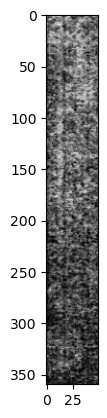

In [127]:
#stufe1 = [img[i][0:130] for i in range(0,600)]
# stufe2 = [img[i][150:300] for i in range(0,600)]
# stufe3 = [img[i][310:490] for i in range(0,600)]
# stufe4 = [img[i][500:650] for i in range(0,600)]
# stufe5 = [img[i][660:800] for i in range(0,600)]
print(596/5)
stufe1 = img[:, 50:100]
stufe2 = img[:, 150:330]
stufe3 = img[:, 280:330]
stufe4 = img[:, 400:450]
stufe5 = img[:, 500:550]

list = [stufe1,stufe2,stufe3,stufe4,stufe5]

pylab.imshow(stufe5, cmap="gray")

# Std and Mean for all Slices

In [128]:
for i in list:
     print("Mean",np.mean(i))
     print("STD",np.std(i))

Mean 162.1486111111111
STD 4.646106286617129
Mean 102.26157407407408
STD 19.919461418454645
Mean 82.07372222222222
STD 1.5589378615496
Mean 35.584
STD 2.012585291498364
Mean 3.8675555555555556
STD 1.8758146740437938


# Load all black images and make median

In [129]:
def getPics(pathin):
     pics = []
     for i in range(0,10):
          path = os.getcwd() + pathin + str(i) + ".png"
          img = cv2.imread(path)
          if img is None:
               print("Check file path")
          gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)[10:370, 0:580]
          print(len(gray))
          gray = np.array(gray)
          pics.append(gray.astype(np.double))
     return pics

In [130]:
path = "/Versuch2-Messdaten/Versuch2-S-bild"
picList = getPics(path)
dunkelbild = np.array(picList).mean(axis=0)

360
360
360
360
360
360
360
360
360
360


## Das Dunkelbild

0.0


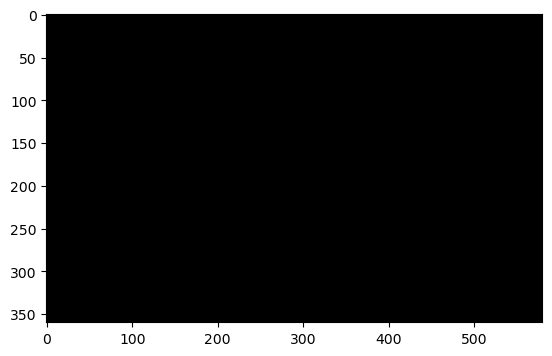

In [131]:
groessterFehler = np.max(dunkelbild)
if groessterFehler == 0:
     kontrastMax = dunkelbild
else:
     kontrastMax = dunkelbild/groessterFehler
plt.imshow(kontrastMax, cmap="gray")
print(groessterFehler)

# Dunkelbild subtrahieren

In [132]:
def SubDarkFrame(darkframe, picpath, name, show = 0):
     img = cv2.imread(picpath)
     if img is None:
          print("Check file path")
     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)[:, 0:580]
     if len(gray >= 360):
          gray = gray[10:370, :]
     gray = np.array(gray)
     result = gray - darkframe
     if show == 1:
          plt.imshow(result, cmap="gray")
     cv2.imwrite(name + ".png", result)


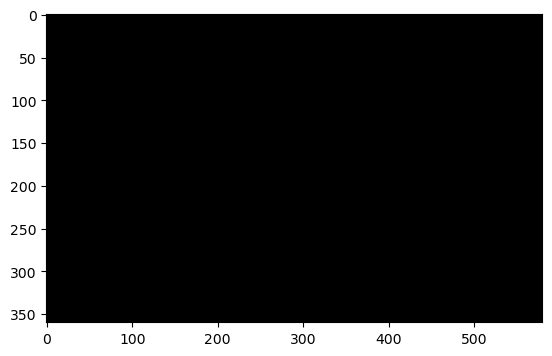

In [133]:
picpath = os.getcwd() + "/Versuch2-Messdaten/Versuch2-S-bild" + str(1) + ".png"

SubDarkFrame(dunkelbild, picpath, "dunkelbild", show = 1)

# Erstellen vom Weißbild

kontrast - min / (max - min)

350
350
350
350
350
350
350
350
350
350
Mittelwert 350 dunkelbild 350
350
Maximaler Weißwert: 142.1


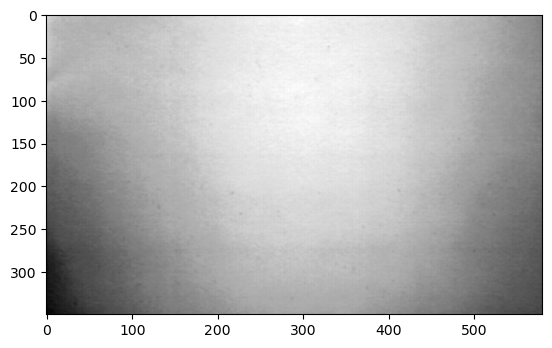

In [134]:
def read_white_image(img_num):
    white_img = cv2.imread(os.getcwd() + "/Versuch2-Messdaten/testWeiss" + str(img_num) + ".png")
    white_img = cv2.cvtColor(white_img, cv2.COLOR_BGR2GRAY)
    return white_img[10:370, 0:580]

for i in range(0,12):
     pic = read_white_image(i)
     cv2.imwrite(os.getcwd() + "/Versuch2-Messdaten/Versuch2-bild" + str(i) + ".png", pic)


path = "/Versuch2-Messdaten/Versuch2-bild"

picList = getPics(path)
mittelwert = np.array(picList).mean(axis=0)
print("Mittelwert " + str(len(mittelwert)) + " dunkelbild " + str(len(dunkelbild[10:370, 0:580])))

weisbild = mittelwert - dunkelbild[10:370, 0:580]
print(len(weisbild))
kontrastMax = weisbild - np.min(weisbild)
kontrastMax = kontrastMax / np.max(kontrastMax)
cv2.imwrite("white.png", weisbild)
plt.imshow(kontrastMax, cmap='gray')
print("Maximaler Weißwert: " + str(np.max(weisbild)))

In [135]:
def NormWhiteFrame(whiteframe):
     whiteframe = whiteframe.astype(np.double)
     whiteframe = whiteframe / np.mean(whiteframe)
     return whiteframe

350


True

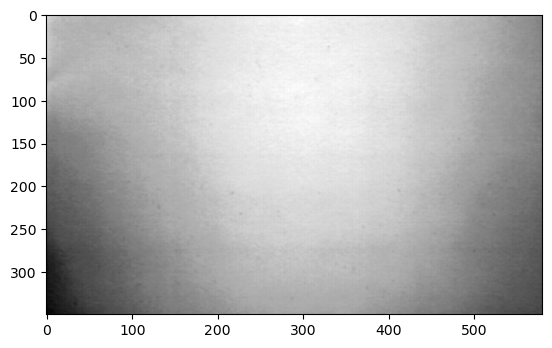

In [136]:
print(len(weisbild))
normiertesWeisBild = NormWhiteFrame(weisbild)
plt.imshow(normiertesWeisBild, cmap="gray")
cv2.imwrite("normiertesWeisbild.png", normiertesWeisBild)

Weißbild 340 IMG 350 dunkelbild 350


True

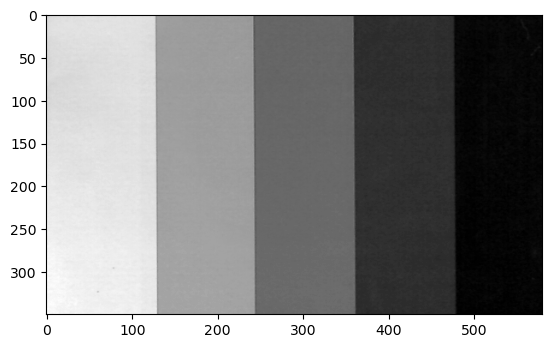

In [137]:
print("Weißbild " + str(len(normiertesWeisBild[10:370, 0:580])) + " IMG " + str(len(img[10:370, 0:580])) + " dunkelbild " + str(len(dunkelbild[10:370, 0:580])))
normiertesKoregierteGrayStufen = (img[10:370, 0:580]-dunkelbild[10:370, 0:580]) / normiertesWeisBild
plt.imshow(normiertesKoregierteGrayStufen, cmap="gray")
cv2.imwrite("normiertesKoregierteGrayStufen.png", normiertesKoregierteGrayStufen)

Mean 170.19242466037747
STD 4.922964301642135
Mean 98.46239502502064
STD 20.474977743799535
Mean 77.55954596005644
STD 1.5836768282390798
Mean 34.717431347319376
STD 1.4662676265928103
Mean 3.9986151527786093
STD 1.8969025771298083


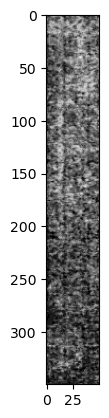

In [138]:
img = normiertesKoregierteGrayStufen
stufe1 = img[:, 50:100]
stufe2 = img[:, 150:330]
stufe3 = img[:, 280:330]
stufe4 = img[:, 400:450]
stufe5 = img[:, 500:550]

list = [stufe1,stufe2,stufe3,stufe4,stufe5]


pylab.imshow(stufe5, cmap="gray")

for i in list:
     print("Mean",np.mean(i))
     print("STD",np.std(i))